In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from nodepy import rk, lm
FE = rk.loadRKM('FE')
BE = rk.loadRKM('BE')
trapezoidal = rk.RungeKuttaMethod(np.array([[0.,0],[0.5,0.5]]),np.array([0.5,0.5]))
trapezoidal.name = 'Implicit Trapezoidal Method'
rk4 = rk.loadRKM('RK44')

Consider the "ODE"
$$u'(t)=-\sin(t)$$ with $$u(0)=1.$$  What is the true solution?

$$u(t) = \cos(t) $$

If we use Euler's method to solve it, the local truncation error is
$$\tau(t) = \frac{1}{2}k u''(t) + O(k^2) = -\frac{k}{2}\cos(t) + O(k^2).$$

Recall our error estimate:
    $$|E^n| \le T e^{LT}\|\tau\|_\infty.$$
    
How big is this bound for our problem, at $T=2$?

$$L=0$$
$$\max_t |\tau| \approx k/2$$
$$|E^n| \le k.$$

 
Let's test this with a time step $k=0.01$:  

In [28]:
def Euler(u,t,k,f):
    return u + k*f(u,t)

f = lambda u,t: -np.sin(t)
T=2.
k=0.01
t=np.arange(0,T+k,k)
U=np.zeros(len(t))
U[0]=1.
for n in range(len(t)-1):
    U[n+1]=Euler(U[n],t[n],k,f)

print('Error at T=2: ',U[-1]-np.cos(T))

Error at T=2:  0.004558288377435327


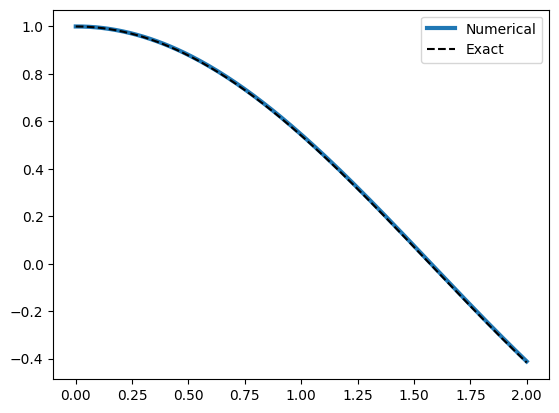

In [29]:
plt.plot(t,U,lw=3);
plt.plot(t,np.cos(t),'--k')
plt.legend(['Numerical','Exact']);

Next, consider the ODE
$$u'(t) = \lambda(u-\cos(t)) - \sin(t),$$
again with $u(0)=1$.  Notice that the solution is again 
$$u(t) = \cos(t)$$ but now the Lipschitz constant of $f$ is $\lambda$.

$$u'(t) = \lambda(u-\cos(t)) - \sin(t),$$

Take $\lambda=-10$ and solve again with Euler's method:

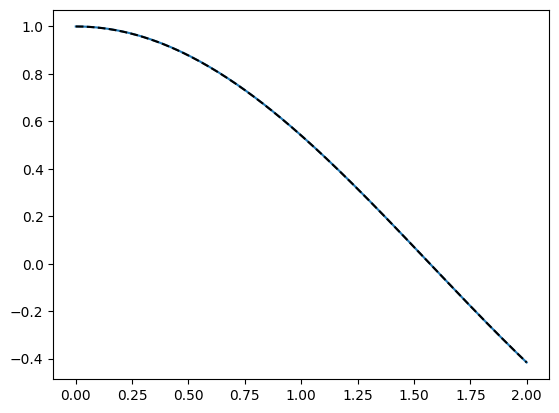

In [30]:
lamda = -10
f = lambda u,t: lamda*(u-np.cos(t))-np.sin(t)
T=2.
k=0.01
t=np.arange(0,T+k,k)
U=np.zeros(len(t))
U[0]=1.
for n in range(len(t)-1):
    U[n+1]=Euler(U[n],t[n],k,f)

plt.plot(t,U);
plt.plot(t,np.cos(t),'--k');

In [31]:
lamda = -10
f = lambda u,t: lamda*(u-np.cos(t))-np.sin(t)
T=2.
k=0.01
t=np.arange(0,T+k,k)
U=np.zeros(len(t))
U[0]=1.
for n in range(len(t)-1):
    U[n+1]=Euler(U[n],t[n],k,f)

print('Error at T=2: ',U[-1]-np.cos(T))

Error at T=2:  -0.0001626243943281258


The error is even smaller.

$$u'(t) = \lambda(u-\cos(t)) - \sin(t),$$

Now let's take $\lambda = -250$ with the same step size $k=1/100$:

In [32]:
lamda = -250
f = lambda u,t: lamda*(u-np.cos(t))-np.sin(t)
T=2.
k=0.01
t=np.arange(0,T+k,k)
U=np.zeros(len(t))
U[0]=1.
for n in range(len(t)-1):
    U[n+1]=Euler(U[n],t[n],k,f)

print('Error at T=2: ',U[-1]-np.cos(T))

Error at T=2:  -3.305869574416633e+30


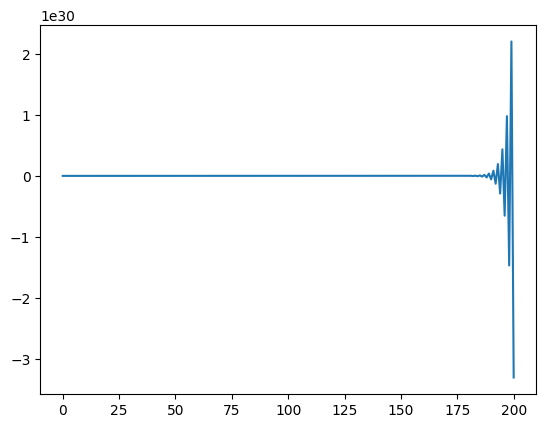

In [33]:
plt.plot(U)

Now the error is huge!  Why?

Our ODE

$$u'(t) = \lambda(u-\cos(t)) - \sin(t)$$

is linear.  We found that the error propagates according to

$$E^{n+1} = (1+k\lambda)E^n - k\tau^n$$

so the error will grow at each step if $|1+k\lambda|>1.$

What values of $k$ will give a reasonably-sized error for this problem?

In [35]:
def solve(k):
    T = 5.4
    t=np.arange(0,T+k,k)
    U=np.zeros(len(t))
    U[0]=1.
    for n in range(len(t)-1):
        U[n+1]=Euler(U[n],t[n],k,f)
    plt.plot(t,U)

interact(solve,k=widgets.FloatText(value=0.01));

interactive(children=(FloatText(value=0.01, description='k'), Output()), _dom_classes=('widget-interact',))

In [ ]:
1/125

What values of $k$ will give a reasonably-sized error for this problem?

$$ | 1 + k\lambda | \le 1 $$
$$ -1 \le 1+ k\lambda \le 1$$
$$ 0 \le k \le -2/\lambda = 0.008$$

What if we use the backward Euler method instead?
$$U^{n+1} = U^n + kf(U^{n+1})$$
For linear problems:

$$U^{n+1} = U^n + k\lambda U^{n+1} + kg(t^{n+1})$$

$$U^{n+1} = (1-k\lambda)^{-1} (U^{n} + k g(t^{n+1}))$$

Similarly, the error at each step gets amplified by the factor
$$\frac{1}{1-k\lambda}.$$
What values of $k$ and $\lambda$ are acceptable?

Let $z=k\lambda$.

We see that forward Euler behaves well if
$$|1+z| \le 1$$
while backward Euler behaves well if
$$\left|\frac{1}{1-z}\right|\le 1.$$

For any Runge--Kutta method, solving the linear problem
$$u'(t) = \lambda u(t)$$
leads to the iteration
$$U^{n+1} = R(z) U^n$$
where $R(z)$ is the *stability function* of the method.  

We say the calculation is *absolutely stable* if $$|R(z)|\le 1.$$

The condition
$$|R(z)|\le 1$$
defines a region in the complex plane, known as the *region of absolute stability*.

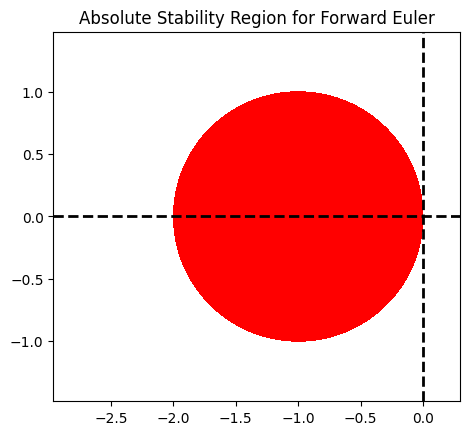

In [36]:
FE.plot_stability_region();

$$|1+z| \le 1$$

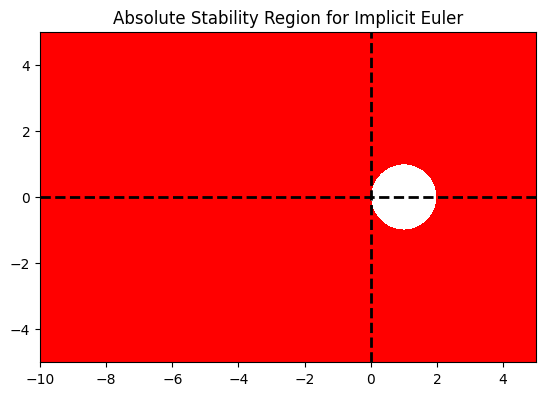

In [37]:
BE.plot_stability_region(bounds=[-10,5,-5,5]);

$$\left|\frac{1}{1-z}\right|\le 1.$$

For what values of $\lambda$ does the true solution of
$$u'(t) = \lambda u(t)$$
remain bounded?

$$u(t) = e^{\lambda t} u(0)$$


$$\lim_{t\to\infty} |u(t)| < \infty \iff \operatorname{Re}(\lambda) \le 0.$$

$$\lim_{t\to\infty} |u(t)| < \infty \iff \operatorname{Re}(\lambda) \le 0.$$

Do any numerical methods mimic this behavior exactly?

Recall the trapezoidal method:
$$U^{n+1} = U^n + \frac{k}{2}(f(U^n) + f(U^{n+1})).$$

We have

$$U^{n+1} = U^n + \frac{\lambda k}{2}(U^n + U^{n+1})$$
or
$$
U^{n+1} = \frac{1+z/2}{1-z/2}U^n.
$$

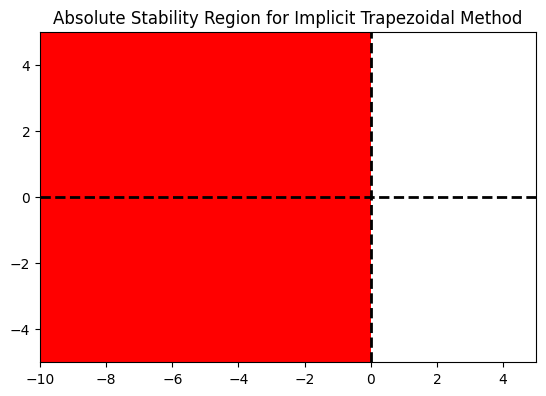

In [38]:
trapezoidal.plot_stability_region(bounds=[-10,5,-5,5]);

$$ \left|\frac{1+z/2}{1-z/2}\right| \le 1$$

Other Runge--Kutta methods can have more complicated stability regions:

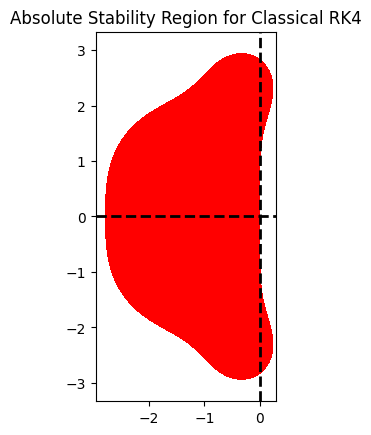

In [39]:
rk4.plot_stability_region();

$$|1+z+\frac{1}{2}z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4|\le 1$$

## Linear systems of equations

Consider the linear system of ODEs

$$u_1'(t) = -u_2(t)$$
$$u_2'(t) = u_1(t).$$

If we take $u_1(0)=1$ and $u_2(0)=0$, the solution is $u_1(t)=\cos(t)$, $u_2(t) = \sin(t)$.

We can write this as $u'(t) = Au(t)$ with

$$A = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}.$$

With Euler's method, we get

$$U^{n+1} = (I+kA)U^n.$$

To avoid that the solution (and error) blow up we need $$\|I+kA\|\le 1.$$

This is just the same as requiring that, for each eigenvalue of $A$, $k\lambda$ must be inside the stability region.
What values of $k$ are acceptable?

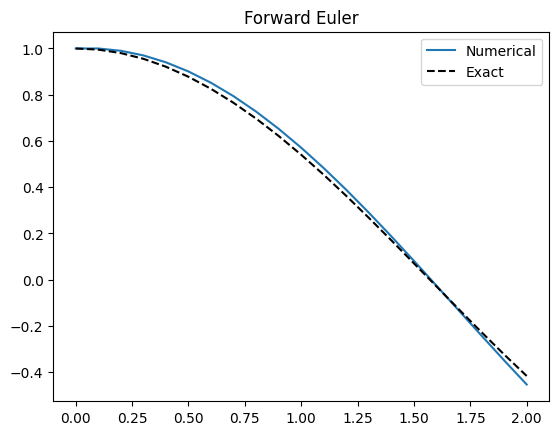

In [40]:
A = np.array([[0,-1.],[1.,0]])
T = 2.
k = 0.1
t=np.arange(0,T+k,k)
U=np.zeros((2,len(t)))
U[0,0] = 1.
U[1,0] = 0.
for n in range(len(t)-1):
    U[:,n+1] = U[:,n] + k*A@U[:,n]

plt.title('Forward Euler')
plt.plot(t,U[0,:])
plt.plot(t,np.cos(t),'--k');
plt.legend(['Numerical','Exact']);

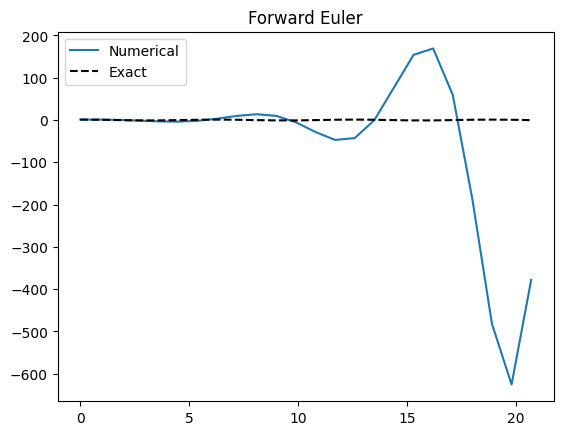

In [41]:
A = np.array([[0,-1.],[1.,0]])
T = 20.
k = 0.9
t=np.arange(0,T+k,k)
U=np.zeros((2,len(t)))
U[0,0] = 1.
U[1,0] = 0.
for n in range(len(t)-1):
    U[:,n+1] = U[:,n] + k*A@U[:,n]

plt.title('Forward Euler')
plt.plot(t,U[0,:])
plt.plot(t,np.cos(t),'--k');
plt.legend(['Numerical','Exact']);

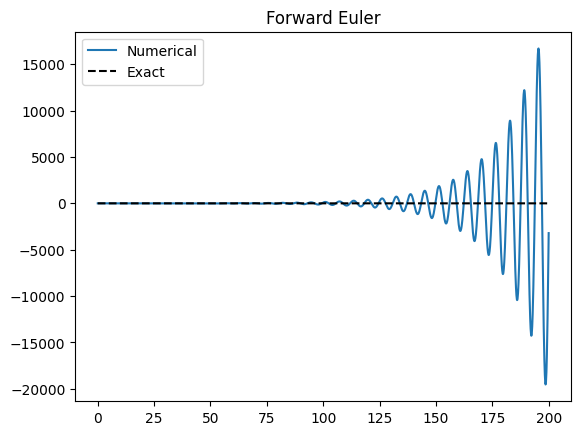

In [42]:
A = np.array([[0,-1.],[1.,0]])
T = 200.
k = 0.1
t=np.arange(0,T+k,k)
U=np.zeros((2,len(t)))
U[0,0] = 1.
U[1,0] = 0.
for n in range(len(t)-1):
    U[:,n+1] = U[:,n] + k*A@U[:,n]

plt.title('Forward Euler')
plt.plot(t,U[0,:])
plt.plot(t,np.cos(t),'--k');
plt.legend(['Numerical','Exact']);

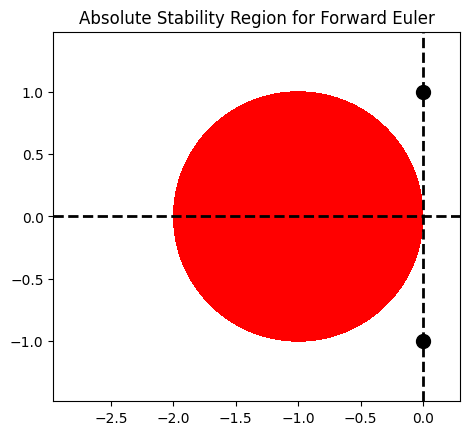

In [43]:
fig=FE.plot_stability_region();
ax = fig.gca()
ax.plot([0,0],[-1,1],'ok',markersize=10);

With the backward Euler method, we get
$$U^{n+1} = (I-kA)^{-1}U^n.$$
To avoid that the solution (and error) blow up we need $$\|(I-kA)^{-1}\|\le 1.$$
What values of $k$ are acceptable?

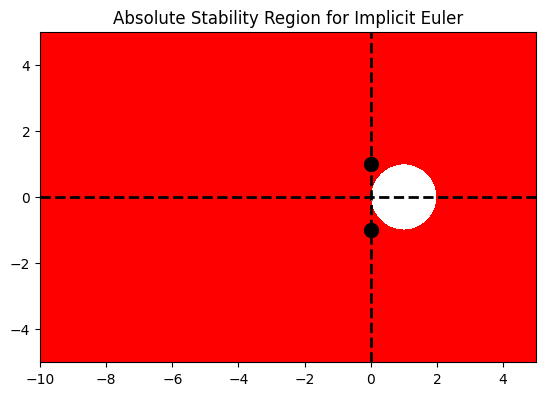

In [44]:
fig=BE.plot_stability_region(bounds=[-10,5,-5,5]);
ax = fig.gca()
ax.plot([0,0],[-1,1],'ok',markersize=10);

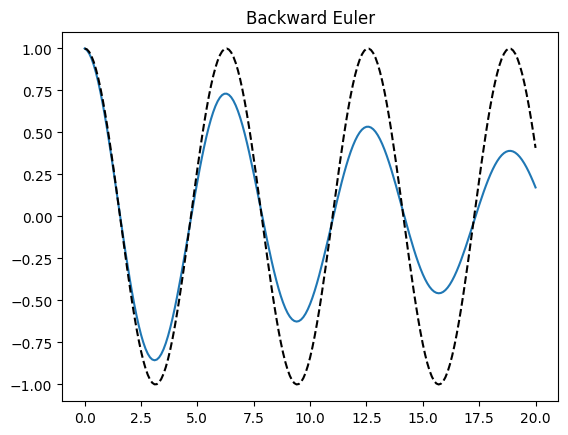

In [45]:
A = np.array([[0,-1.],[1.,0]])
T = 20.
k = 0.1
t=np.arange(0,T+k,k)
U=np.zeros((2,len(t)))
U[0,0] = 1.
U[1,0] = 0.
for n in range(len(t)-1):
    U[:,n+1] = np.linalg.solve(np.eye(2) - k*A,U[:,n])

plt.title('Backward Euler')
plt.plot(t,U[0,:])
plt.plot(t,np.cos(t),'--k');

With the implicit trapezoidal method, we get
$$U^{n+1} = (I-kA/2)^{-1}(I+kA/2)U^n.$$

What values of $k$ are acceptable?

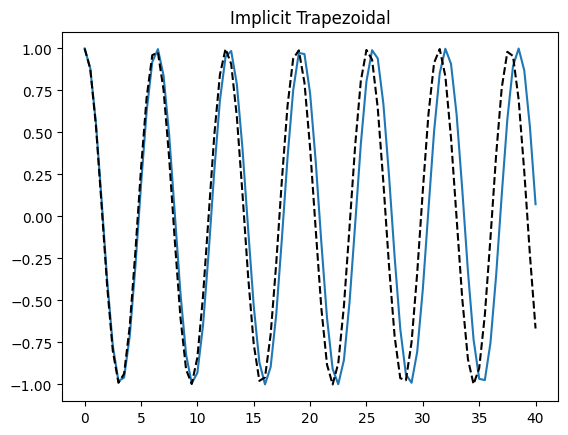

In [46]:
A = np.array([[0,-1.],[1.,0]])
T = 40.
k = 0.5
t=np.arange(0,T+k,k)
U=np.zeros((2,len(t)))
U[0,0] = 1.
U[1,0] = 0.
I = np.eye(2)
for n in range(len(t)-1):
    U[:,n+1] = np.linalg.solve(I - k/2*A,(I+k/2*A)@U[:,n])

plt.title('Implicit Trapezoidal')
plt.plot(t,U[0,:])
plt.plot(t,np.cos(t),'--k');

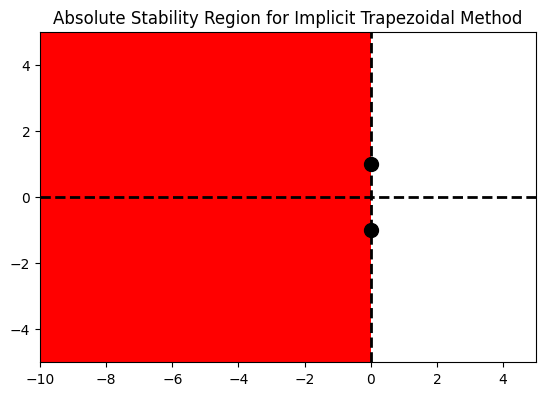

In [47]:
fig=trapezoidal.plot_stability_region(bounds=[-10,5,-5,5]);
ax = fig.gca()
ax.plot([0,0],[-1,1],'ok',markersize=10);

## Absolute stability for linear multistep methods

Given a multistep method

$$ \sum_{j=0}^r \alpha_j U^{n+j} = k \sum_{j=0}^r \beta_j f(U^{n+j})$$

we again apply it to the test problem

$$ u'(t) = \lambda u(t).$$

This gives

$$\sum_{j=0}^r \alpha_j U^{n+j} = k \sum_{j=0}^r \beta_j \lambda U^{n+j} = z \sum_{j=0}^r \beta_j U^{n+j}$$

or

$$\sum_{j=0}^r (\alpha_j - z \beta_j) U^{n+j} = 0.$$

Similarly, for the error we find
$$\sum_{j=0}^r (\alpha_j - z \beta_j) E^{n+j} = k \tau^n.$$

$$\sum_{j=0}^r (\alpha_j - z \beta_j) E^{n+j} = k \tau^n.$$

The error will grow if the polynomial

$$\pi(\zeta; z) = \sum_{j=0}^r (\alpha_j - z \beta_j) \zeta^{j} = 0$$

has roots with magnitude greater than one.

For example, for the leapfrog method
$$U^{n+2} = U^n + 2k f(U^{n+1})$$

we have for the linear test problem

$$U^{n+2} - 2z U^{n+1} - U^n = 0$$

so
$$\pi(\zeta;z) = \zeta^2 - 2z \zeta - 1$$

What are the roots?

$$\zeta_\pm = z \pm \sqrt{z^2 + 1}$$

What is the stability region?

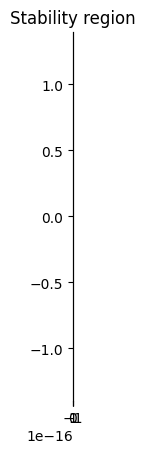

In [48]:
alpha = np.array([-1.,0.,1.])
beta = np.array([0.,2.,0.])
leapfrog = lm.LinearMultistepMethod(alpha,beta)

leapfrog.plot_stability_region();

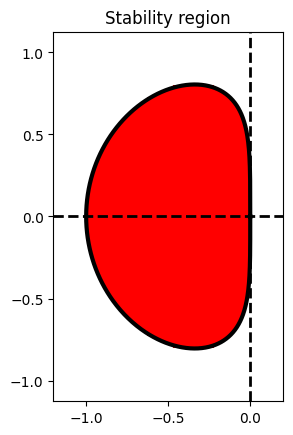

In [49]:
ab2 = lm.Adams_Bashforth(2)
ab2.plot_stability_region();

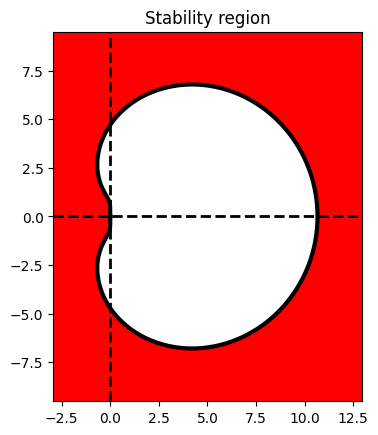

In [50]:
bdf4 = lm.backward_difference_formula(4)
bdf4.plot_stability_region();